<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [103]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [65]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)


### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




['35-44 years old' '25-34 years old' '45-54 years old' '55-64 years old'
 '18-24 years old' '65 years or older' 'Under 18 years old']


/tmp/ipykernel_320/1497240183.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


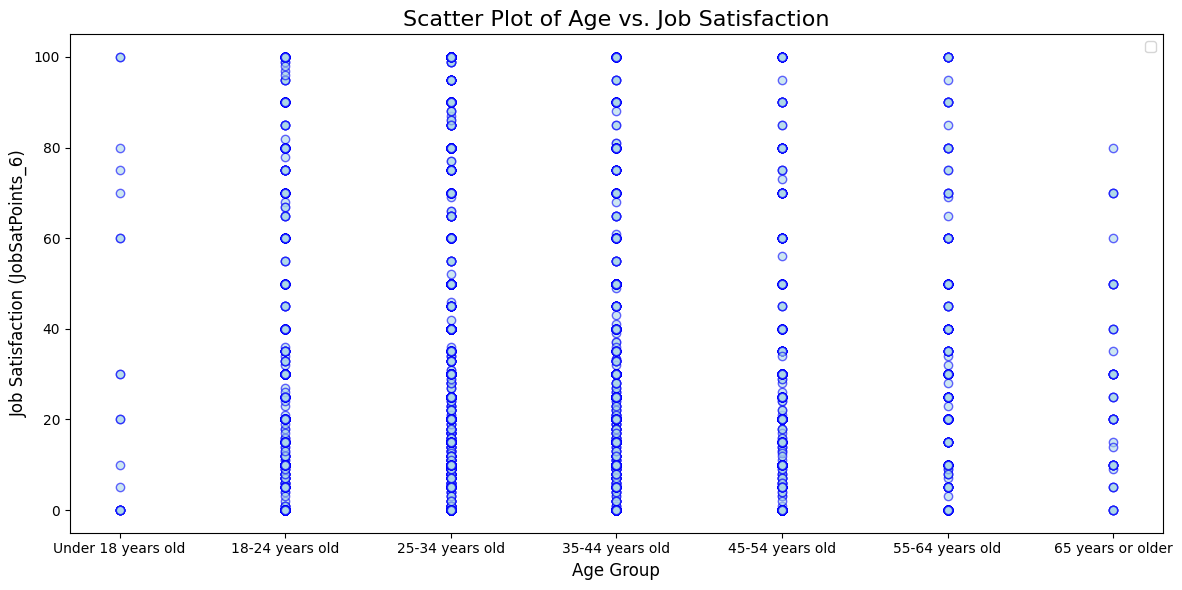

In [88]:
## Write your code here

print(df['Age'].unique())

# Replace 'Prefer not to say' with NaN and drop rows with NaN
df['Age'] = df['Age'].replace('Prefer not to say', None)
df.dropna(subset=['Age', 'JobSatPoints_6'], inplace=True)

# Age mapping
age_mapping = {
    "Under 18 years old": 1,
    "18-24 years old": 2,
    "25-34 years old": 3,
    "35-44 years old": 4,
    "45-54 years old": 5,
    "55-64 years old": 6,
    "65 years or older": 7
}

df['AgeMapped'] = df['Age'].map(age_mapping)

# Ensure no NaN values in AgeMapped or JobSatPoints_6
df.dropna(subset=['AgeMapped', 'JobSatPoints_6'], inplace=True)

# Scatter plot for Age vs. Job Satisfaction
plt.figure(figsize=(12, 6))
plt.scatter(df['AgeMapped'], df['JobSatPoints_6'], color='lightblue', edgecolors='blue', alpha=0.6)
plt.title('Scatter Plot of Age vs. Job Satisfaction', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=12)

plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7], labels=["Under 18 years old", "18-24 years old", "25-34 years old", "35-44 years old", 
                                              "45-54 years old", "55-64 years old", "65 years or older"])
plt.tight_layout() 
plt.legend()

plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


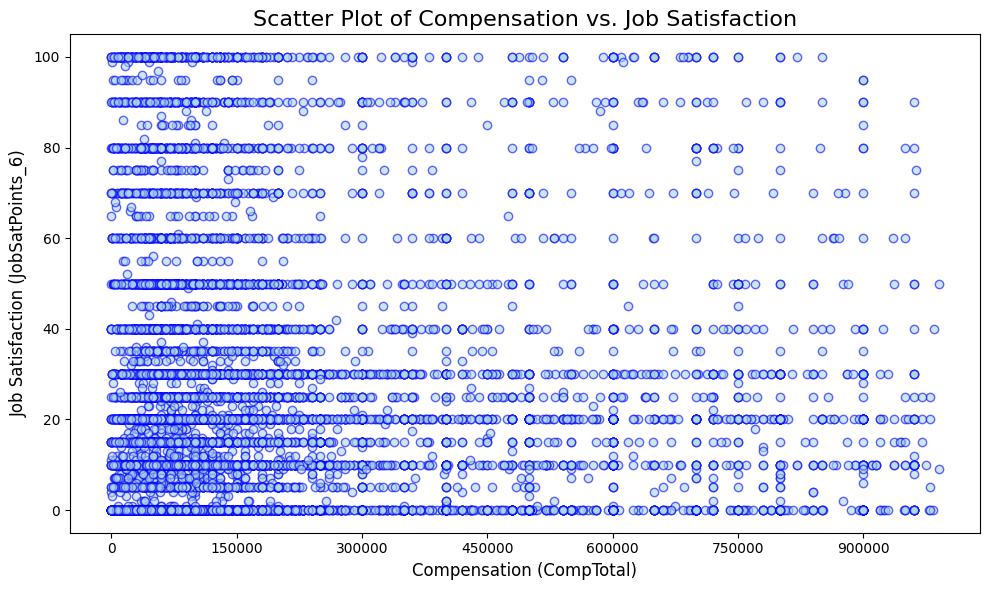

In [89]:
## Write your code here

from matplotlib.ticker import MaxNLocator, ScalarFormatter

# Drop rows with NaN
df.dropna(subset=['CompTotal', 'JobSatPoints_6'], inplace=True)

# Remove unrealistic values
df = df[df['CompTotal'] < 1_000_000]

# Create a scatter plot for Compensation vs. Job Satisfaction
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['CompTotal'], df['JobSatPoints_6'], color='lightblue', edgecolor='blue', alpha=0.6)
ax.set_title('Scatter Plot of Compensation vs. Job Satisfaction', fontsize=16)
ax.set_xlabel('Compensation (CompTotal)', fontsize=12)
ax.set_ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=12)

# Disable scientific notation 
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


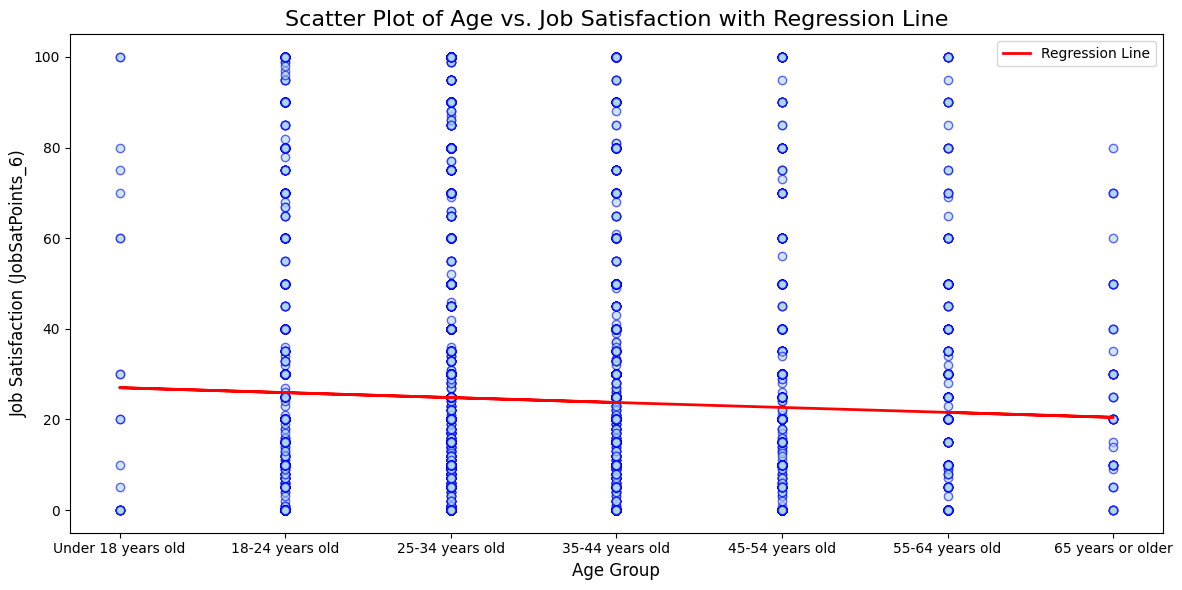

In [90]:
## Write your code here

# Replace 'Prefer not to say' with NaN and drop rows with NaN
df['Age'] = df['Age'].replace('Prefer not to say', None)
df.dropna(subset=['Age', 'JobSatPoints_6'], inplace=True)

# Age mapping
age_mapping = {
    "Under 18 years old": 1,
    "18-24 years old": 2,
    "25-34 years old": 3,
    "35-44 years old": 4,
    "45-54 years old": 5,
    "55-64 years old": 6,
    "65 years or older": 7
}

df['AgeMapped'] = df['Age'].map(age_mapping)

# Ensure no NaN values in AgeMapped or JobSatPoints_6
df.dropna(subset=['AgeMapped', 'JobSatPoints_6'], inplace=True)

# Scatter plot for Age vs. Job Satisfaction 
plt.figure(figsize=(12, 6))
plt.scatter(df['AgeMapped'], df['JobSatPoints_6'], color='lightblue', edgecolors='blue', alpha=0.6)

# Calculate the regression line
slope, intercept = np.polyfit(df['AgeMapped'], df['JobSatPoints_6'], 1)

# Create a line based on the slope and intercept
regression_line = slope * df['AgeMapped'] + intercept

# Plot the regression line on top of the scatter plot
plt.plot(df['AgeMapped'], regression_line, color='red', linestyle='-', linewidth=2, label='Regression Line')
plt.title('Scatter Plot of Age vs. Job Satisfaction with Regression Line', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=12)

plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7], labels=["Under 18 years old", "18-24 years old", "25-34 years old", "35-44 years old", 
                                              "45-54 years old", "55-64 years old", "65 years or older"])
plt.tight_layout()  
plt.legend()

plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


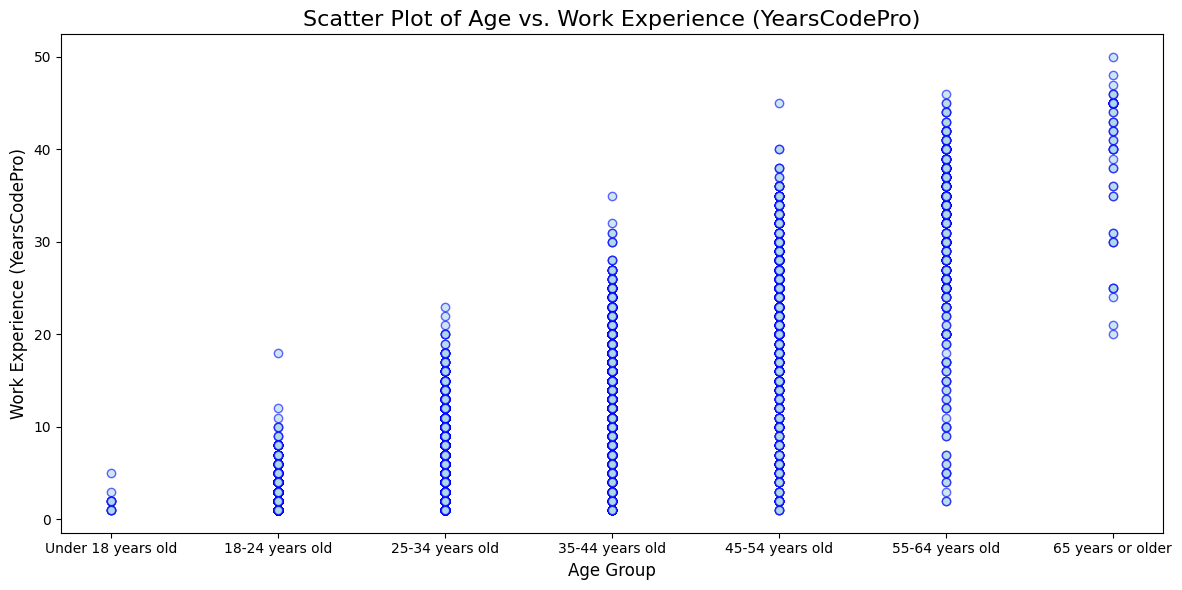

In [91]:
## Write your code here

# Replace 'Prefer not to say' with NaN and drop rows with NaN
df['Age'] = df['Age'].replace('Prefer not to say', None)
df.dropna(subset=['Age', 'YearsCodePro'], inplace=True)

# Age mapping
age_mapping = {
    "Under 18 years old": 1,
    "18-24 years old": 2,
    "25-34 years old": 3,
    "35-44 years old": 4,
    "45-54 years old": 5,
    "55-64 years old": 6,
    "65 years or older": 7
}

# Apply mapping to the 'Age' column
df['AgeMapped'] = df['Age'].map(age_mapping)

# Ensure 'YearsCodePro' is numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['AgeMapped'], df['YearsCodePro'], color='lightblue', edgecolors='blue', alpha=0.6)
plt.title('Scatter Plot of Age vs. Work Experience (YearsCodePro)', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Work Experience (YearsCodePro)', fontsize=12)

plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7], labels=["Under 18 years old", "18-24 years old", "25-34 years old", 
                                                  "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older"])
plt.tight_layout()
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


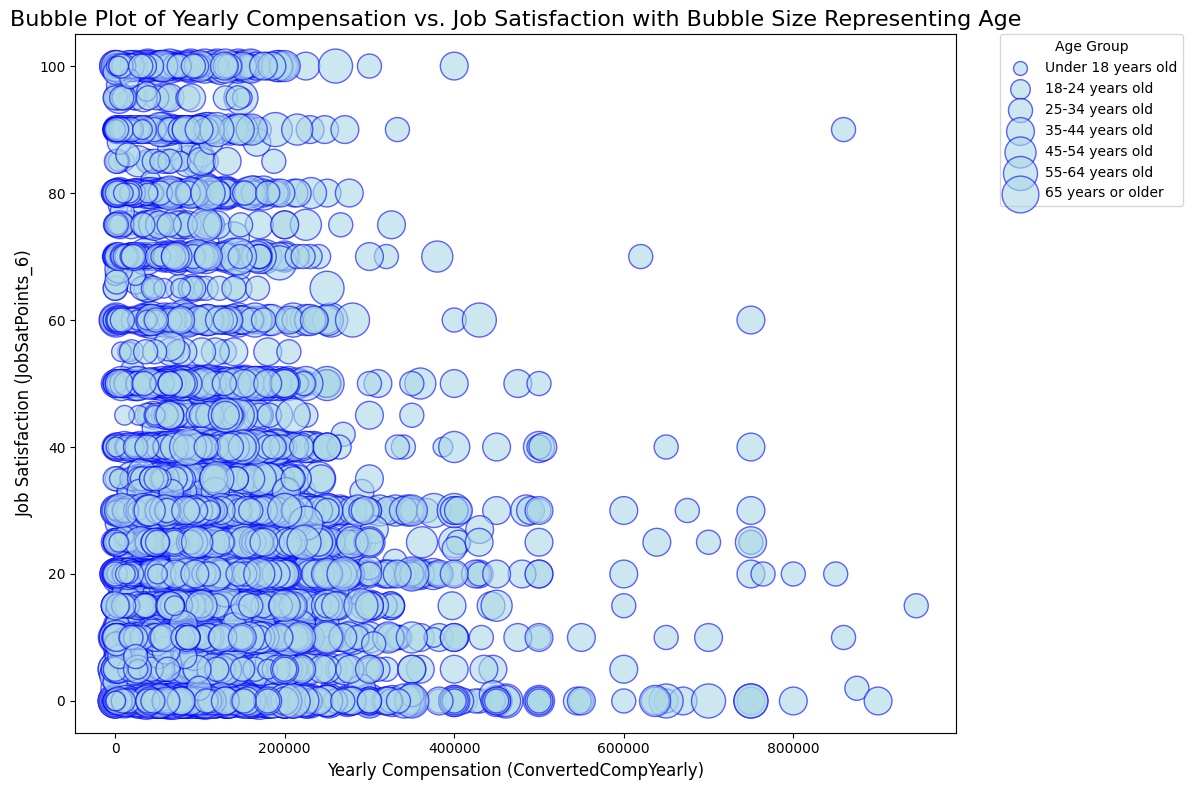

In [92]:
## Write your code here

# Clean the data
df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age'], inplace=True)

# Map Age
age_mapping = {
    "Under 18 years old": 1,
    "18-24 years old": 2,
    "25-34 years old": 3,
    "35-44 years old": 4,
    "45-54 years old": 5,
    "55-64 years old": 6,
    "65 years or older": 7
}

# Map Age
df['AgeMapped'] = df['Age'].map(age_mapping)

# Ensure ConvertedCompYearly is numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Remove unrealistic compensation values
df = df[df['ConvertedCompYearly'] < 1_000_000]

# Define bubble sizes based on the mapped age values
df['BubbleSize'] = df['AgeMapped'] * 100 

# Bubble plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=df['ConvertedCompYearly'],
    y=df['JobSatPoints_6'],
    s=df['BubbleSize'],
    alpha=0.6,
    color='lightblue',
    edgecolors='blue'
)

plt.title('Bubble Plot of Yearly Compensation vs. Job Satisfaction with Bubble Size Representing Age', fontsize=16)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)', fontsize=12)
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=12)

age_labels = ["Under 18 years old", "18-24 years old", "25-34 years old", "35-44 years old", 
              "45-54 years old", "55-64 years old", "65 years or older"]

age_sizes = [age_mapping[age] * 100 for age in age_labels]
for i, label in enumerate(age_labels):
    plt.scatter([], [], s=age_sizes[i], color='lightblue', edgecolors='blue', alpha=0.6, label=label)

plt.legend(title='Age Group', loc='upper left', fontsize=10, bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.tight_layout() 
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


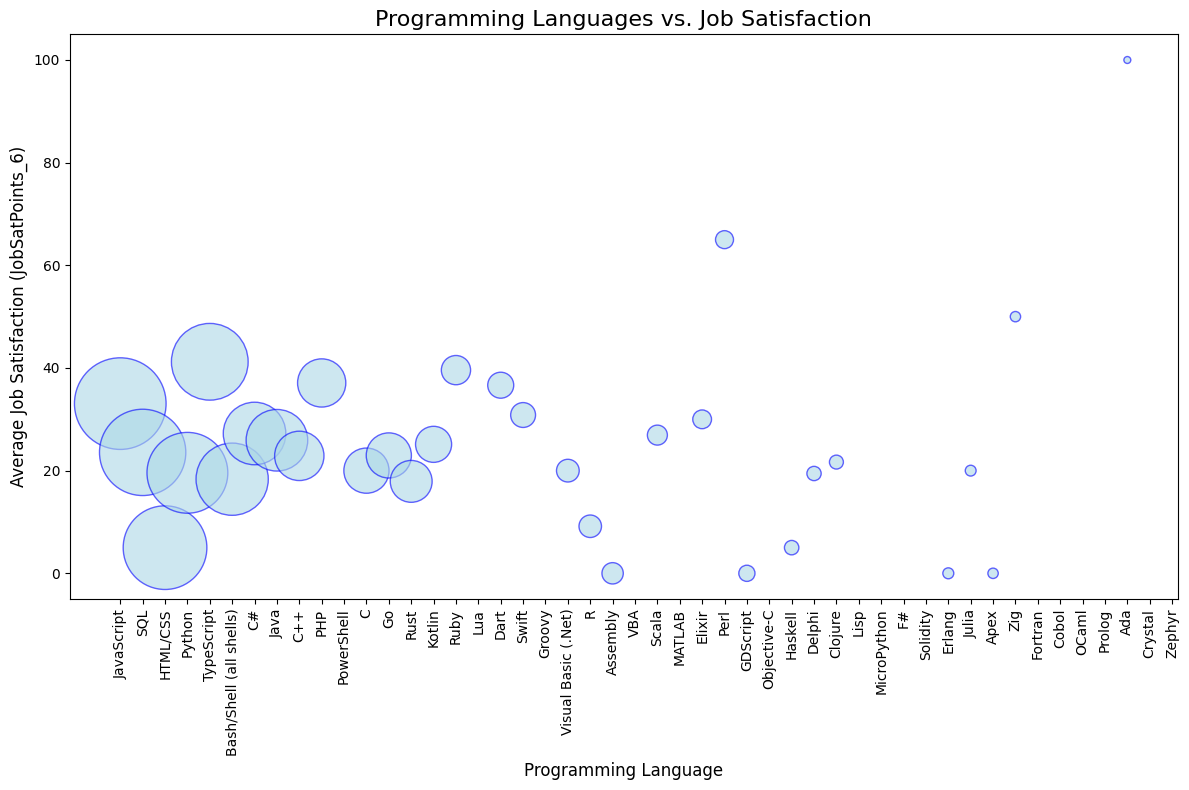

In [93]:
## Write your code here

# Clean the data 
df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'], inplace=True)

# Split the 'LanguageHaveWorkedWith' column into individual languages
languages = df['LanguageHaveWorkedWith'].str.split(';').explode()

# Count values
languages_count = languages.value_counts()

# Average job satisfaction for each language
avg_job_satisfaction = df.explode('LanguageHaveWorkedWith').groupby('LanguageHaveWorkedWith')['JobSatPoints_6'].mean()

# Merge the counts and average satisfaction into one DataFrame
language_data = pd.DataFrame({
    'Language': languages_count.index,
    'Count': languages_count.values,
})

language_data['AvgJobSatisfaction'] = language_data['Language'].map(avg_job_satisfaction)

# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(
    language_data['Language'],
    language_data['AvgJobSatisfaction'],
    s=language_data['Count'] / 2,
    alpha=0.6,
    color='lightblue',
    edgecolors='blue'
)

plt.title('Programming Languages vs. Job Satisfaction', fontsize=16)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)', fontsize=12)

plt.xticks(rotation=90)

plt.tight_layout()  # Adjust layout to avoid label overlap
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_320/1601907275.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(employment_types))


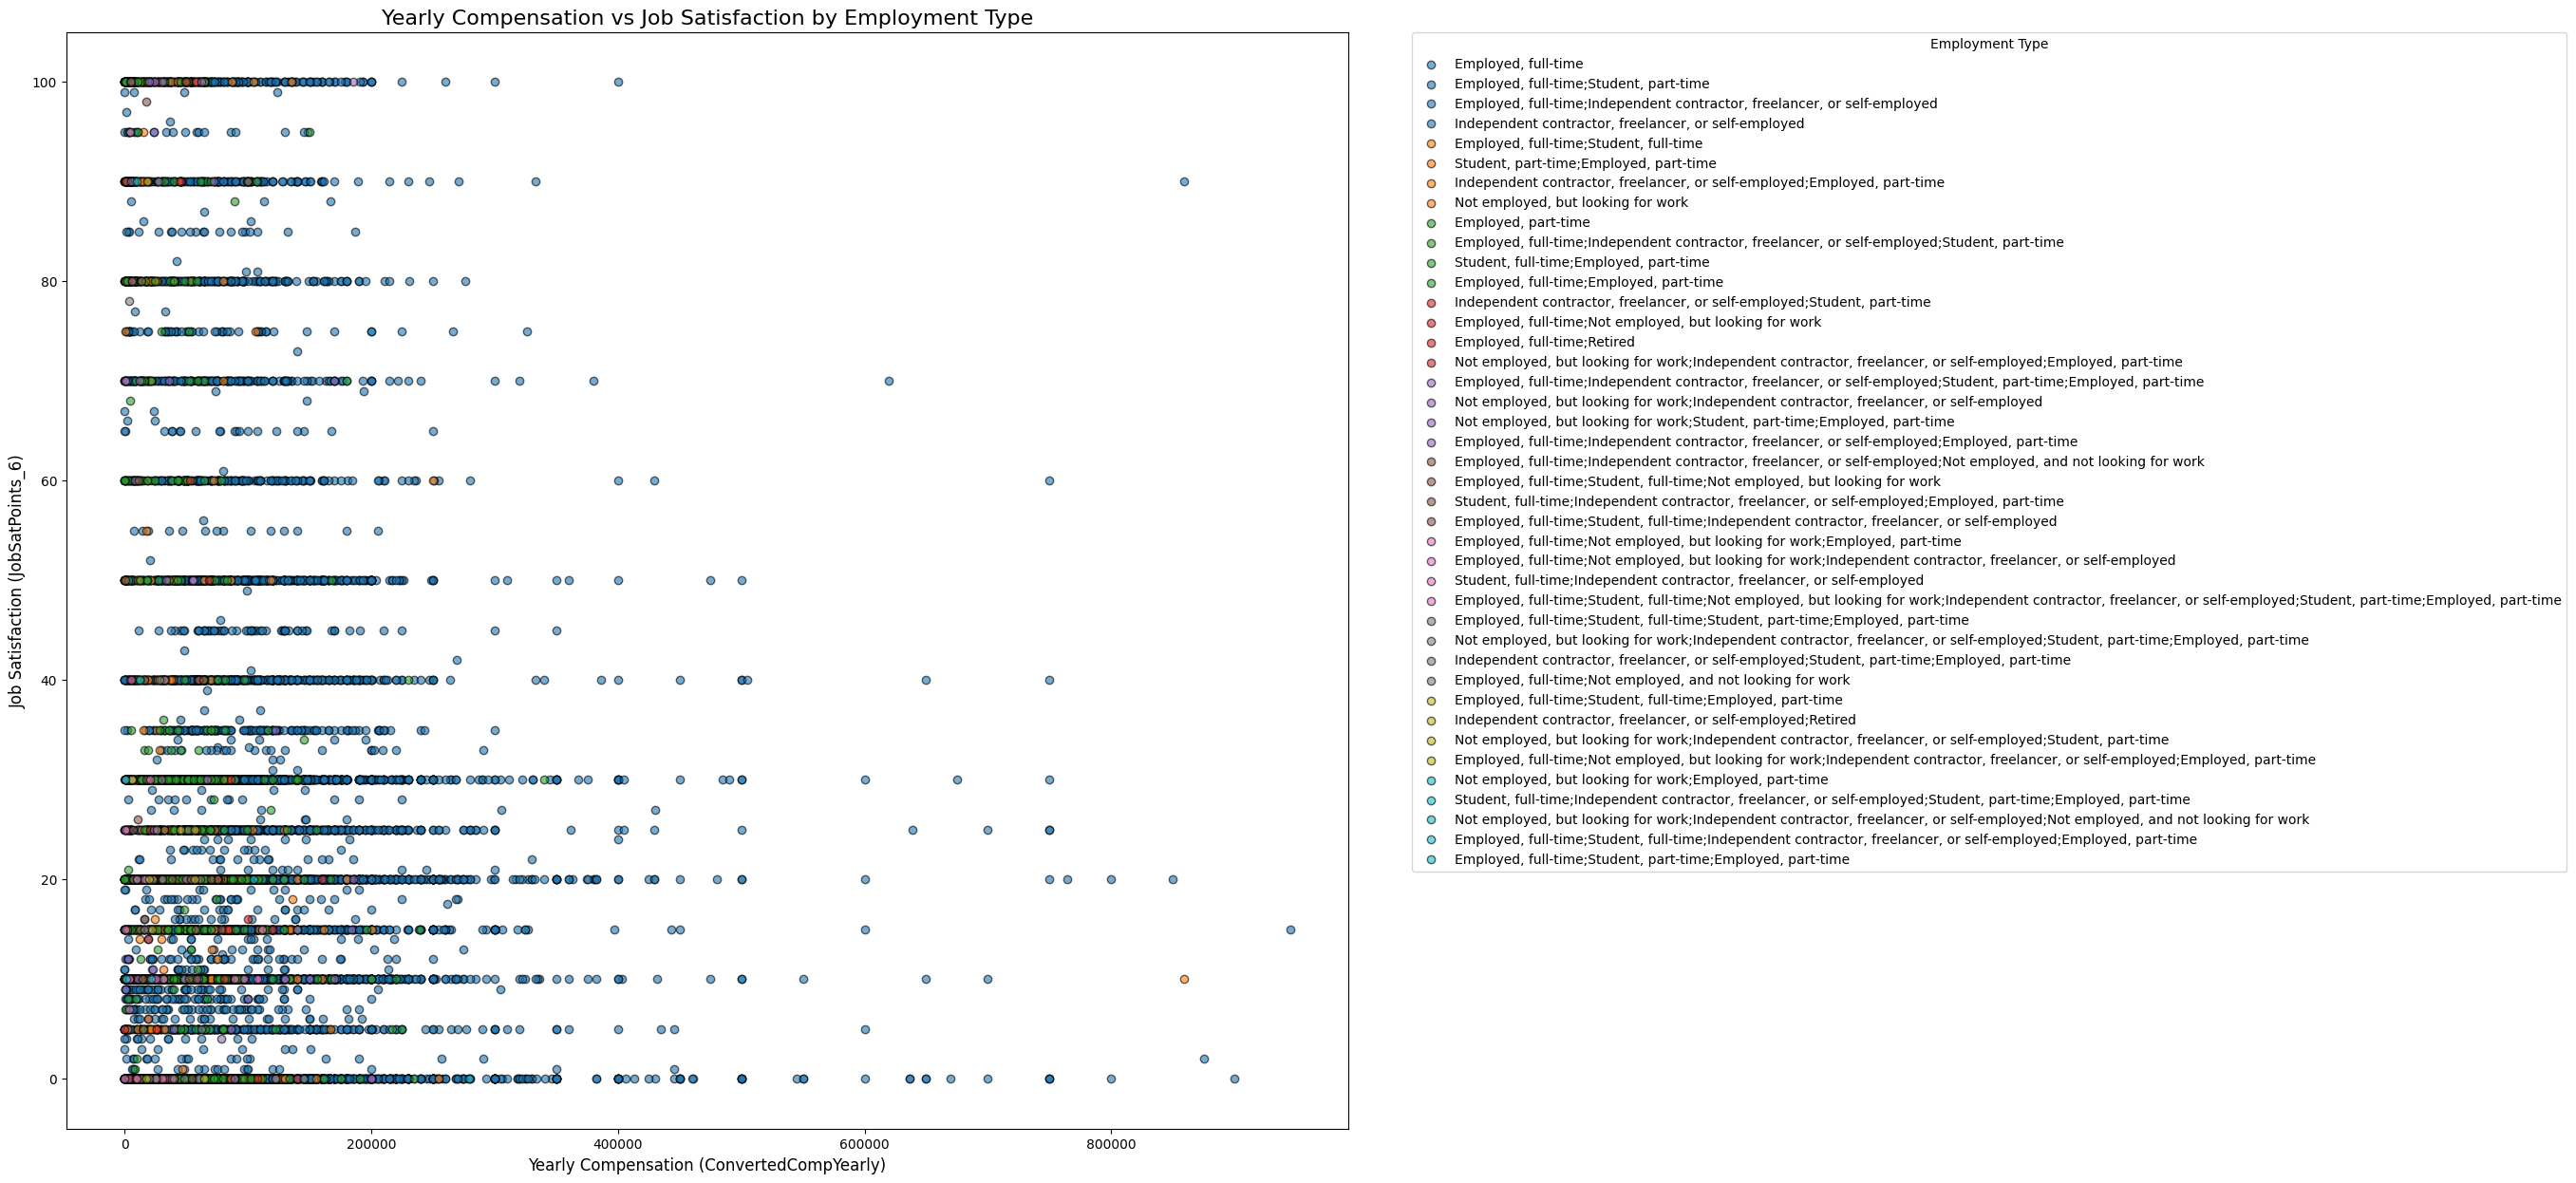

In [95]:
## Write your code here

# Clean the data 
df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'], inplace=True)

# Scatter plot with color for each employment type
plt.figure(figsize=(20, 15))
employment_types = df['Employment'].unique()
colors = plt.cm.get_cmap('tab10', len(employment_types))

for idx, employment_type in enumerate(employment_types):
    subset = df[df['Employment'] == employment_type]
    
    plt.scatter(
        subset['ConvertedCompYearly'],
        subset['JobSatPoints_6'],
        label=employment_type,
        color=colors(idx),
        alpha=0.6,
        edgecolors='black',
        marker='o'
    )

plt.title('Yearly Compensation vs Job Satisfaction by Employment Type', fontsize=16)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)', fontsize=12)
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=12)
plt.legend(title='Employment Type', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.subplots_adjust(right=0.8)

plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


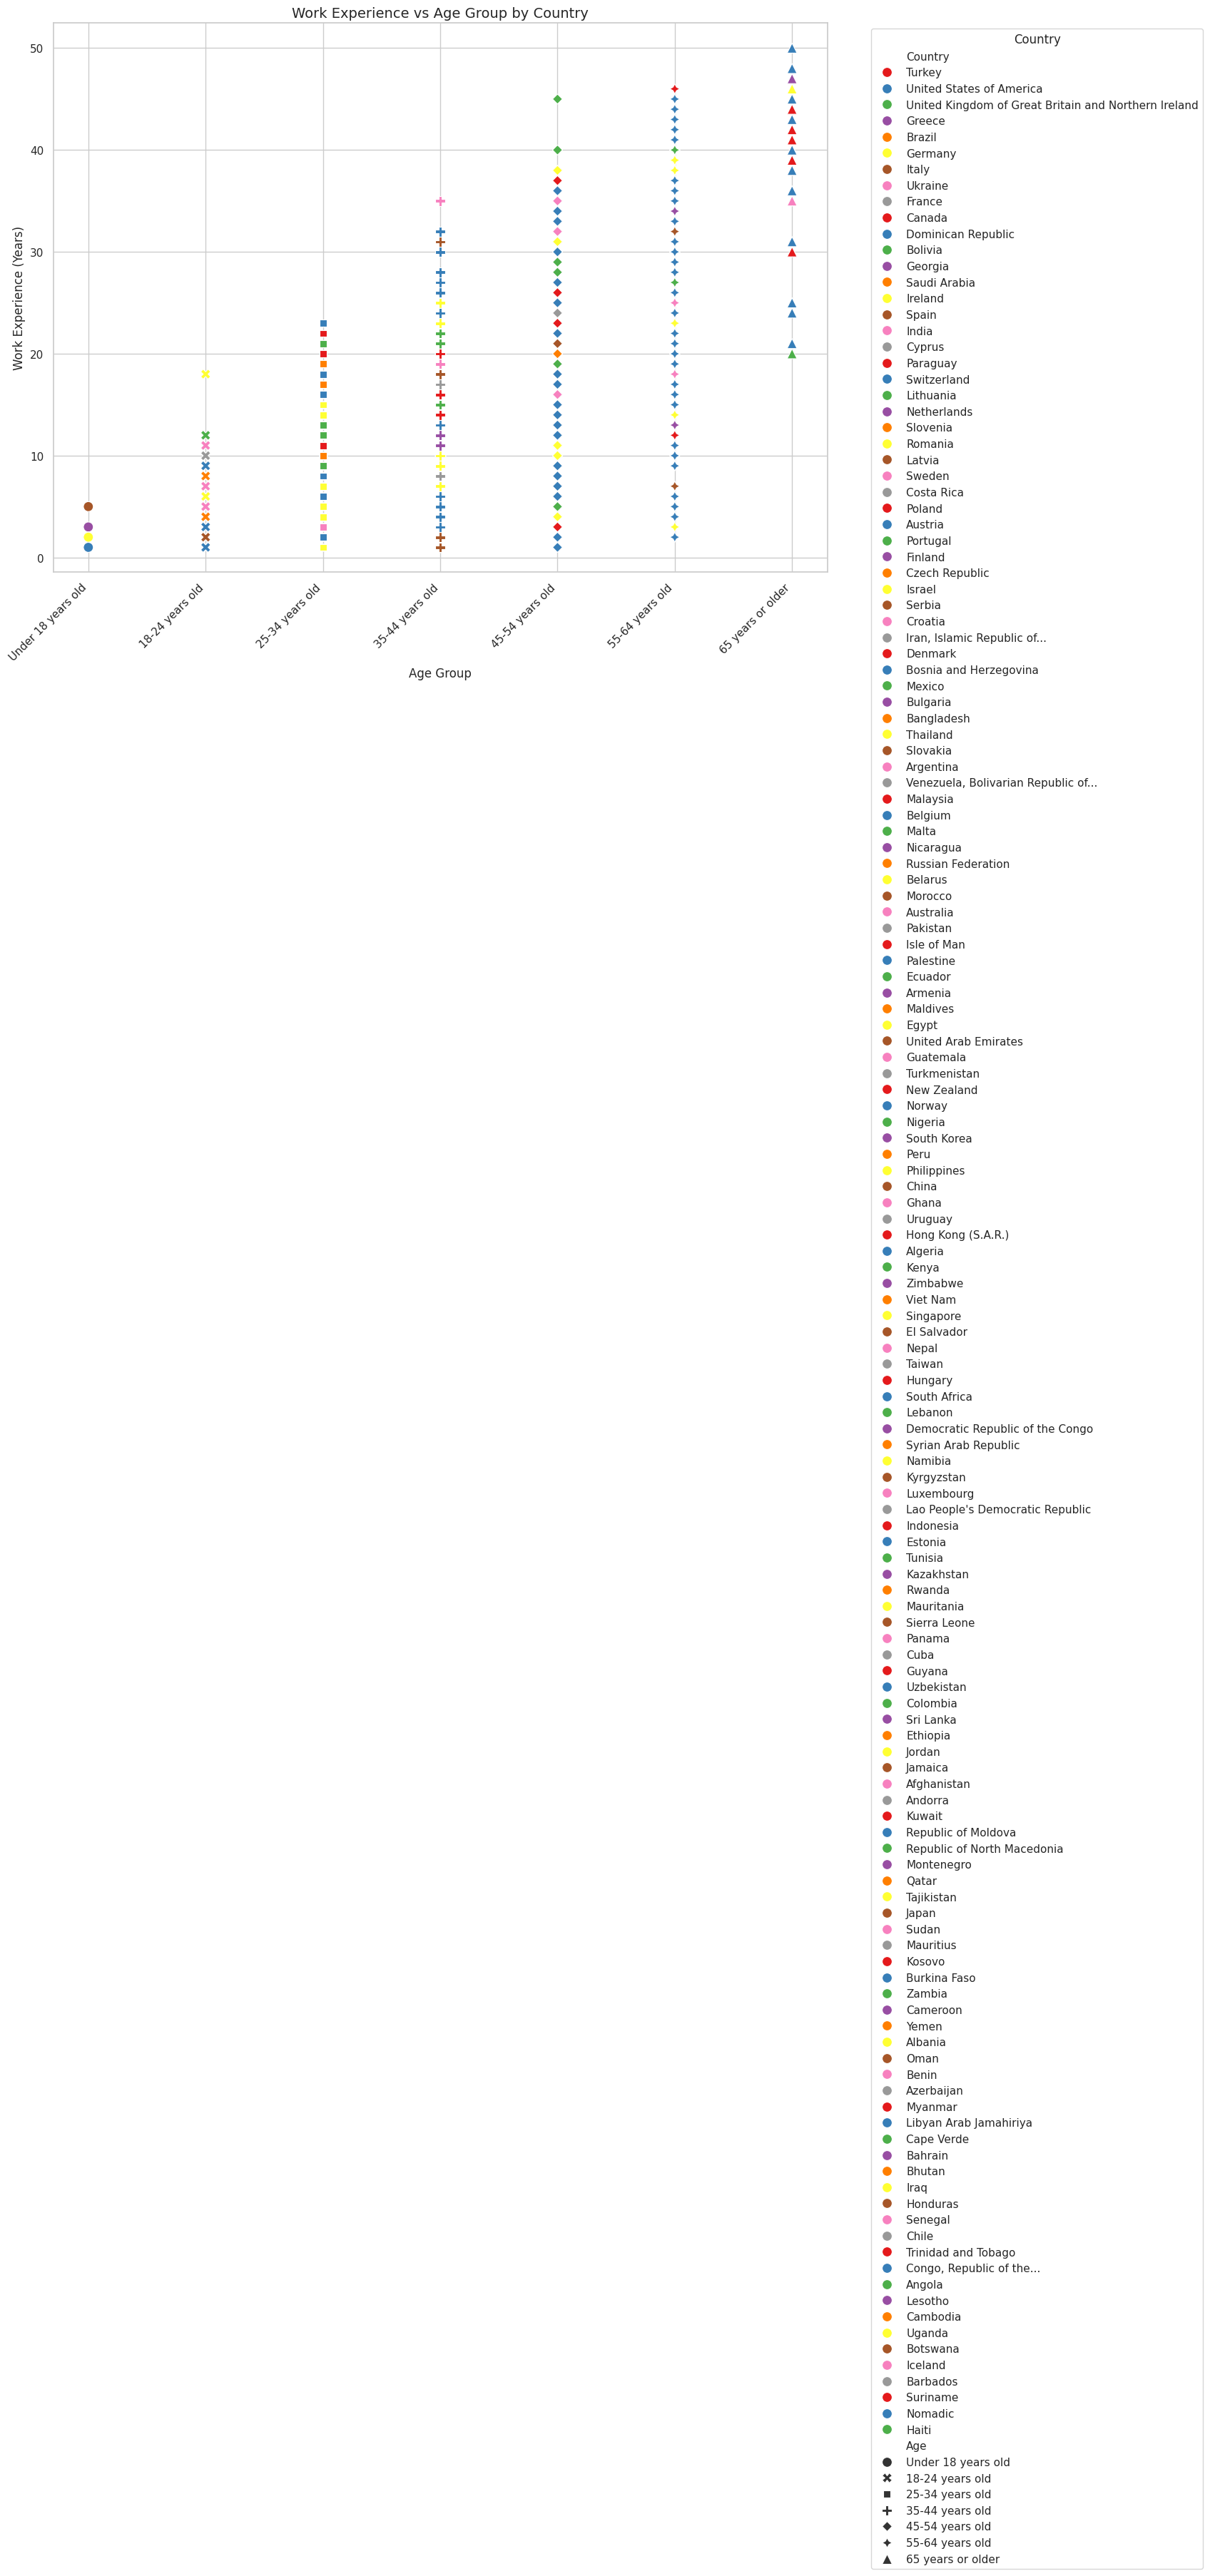

In [118]:
## Write your code here

import seaborn as sns

# Clean the data
df['Age'] = df['Age'].replace('Prefer not to say', pd.NA)
df.dropna(subset=['YearsCodePro', 'Age', 'Country'], inplace=True)

# Define the correct order for age groups
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', 
             '55-64 years old', '65 years or older']

# Convert 'Age' column to a categorical type with the defined order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Set up the seaborn style
sns.set(style="whitegrid")

# Scatter plot 
plt.figure(figsize=(14, 10))

# Use hue for country (color) and style for Age (marker shape)
sns.scatterplot(data=df, x='Age', y='YearsCodePro', hue='Country', style='Age', palette='Set1', s=100)
plt.title('Work Experience vs Age Group by Country', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Work Experience (Years)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
